In [2]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [7]:
sns.set_context("paper", font_scale=1)

from matplotlib import rcParams
# Set global font properties to Arial
rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': 'Arial',
    'pdf.fonttype': 42,       # Embed fonts as Type 3 fonts for compatibility
    'ps.fonttype': 42,
    "text.usetex": False,
    'svg.fonttype': 'none',
})

In [8]:
# rcParams.update({    
#     'font.size': 20,         # Set a default font size
#     'legend.fontsize': 13,
#     'legend.handlelength': 2,
#     'xtick.labelsize': 13,
#     'ytick.labelsize': 16,
#     'axes.labelsize': 16,
# })

# Ideas  Summary

- The data is better converted to txt/CSV format.
- The Graph will be undirected and there may be multiple edges between two nodes.  
- Use color to represent different connect types, and color opacity to show the weight. e.g.

# Import Data

In [14]:
data_df = pd.read_csv("network_connections.txt", sep='\t', header =[0,1],  index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'network_connections.txt'

In [ ]:
# Manually rename columns
new_columns = []
for col in data_df.columns:
    if 'Unnamed' in col[0]:
        new_columns.append((new_columns[-1][0], col[1]))  # Reuse the previous column's name
    else:
        new_columns.append(col)

In [10]:
data_df.columns = pd.MultiIndex.from_tuples(new_columns)

TypeError: Cannot infer number of levels from empty list

In [11]:
data_df.fillna(0, inplace=True)

NameError: name 'data_df' is not defined

In [12]:
data_df

NameError: name 'data_df' is not defined

In [11]:
all_people = list(data_df.index)

In [12]:
all_people

['Ansari',
 'Belsky',
 'Bilbo',
 'Binder',
 'Citri',
 'Dias',
 'Frankland',
 'Goldenberg',
 'Gunnar',
 'Kobor',
 'Levine',
 'McDade',
 'Mostafavi',
 'Odgers',
 "O'Donnell",
 'Sokolowski',
 'Tung']

In [13]:
def check_data(df):
    assert sorted(data_df.columns.levels[0]) == sorted(data_df.index)

In [14]:
check_data(data_df)

In [15]:
heatmap_options = {"cmap":'Reds', 
            "cbar" : True, 
            "linewidths" : 1
                   , 
                     "annot": True, 
                  }

<Figure size 2000x800 with 0 Axes>

<Axes: xlabel='None-None'>

Text(0.5, 58.91666666666664, '')

Text(0.5, 1.0, 'Heatmap of Data')

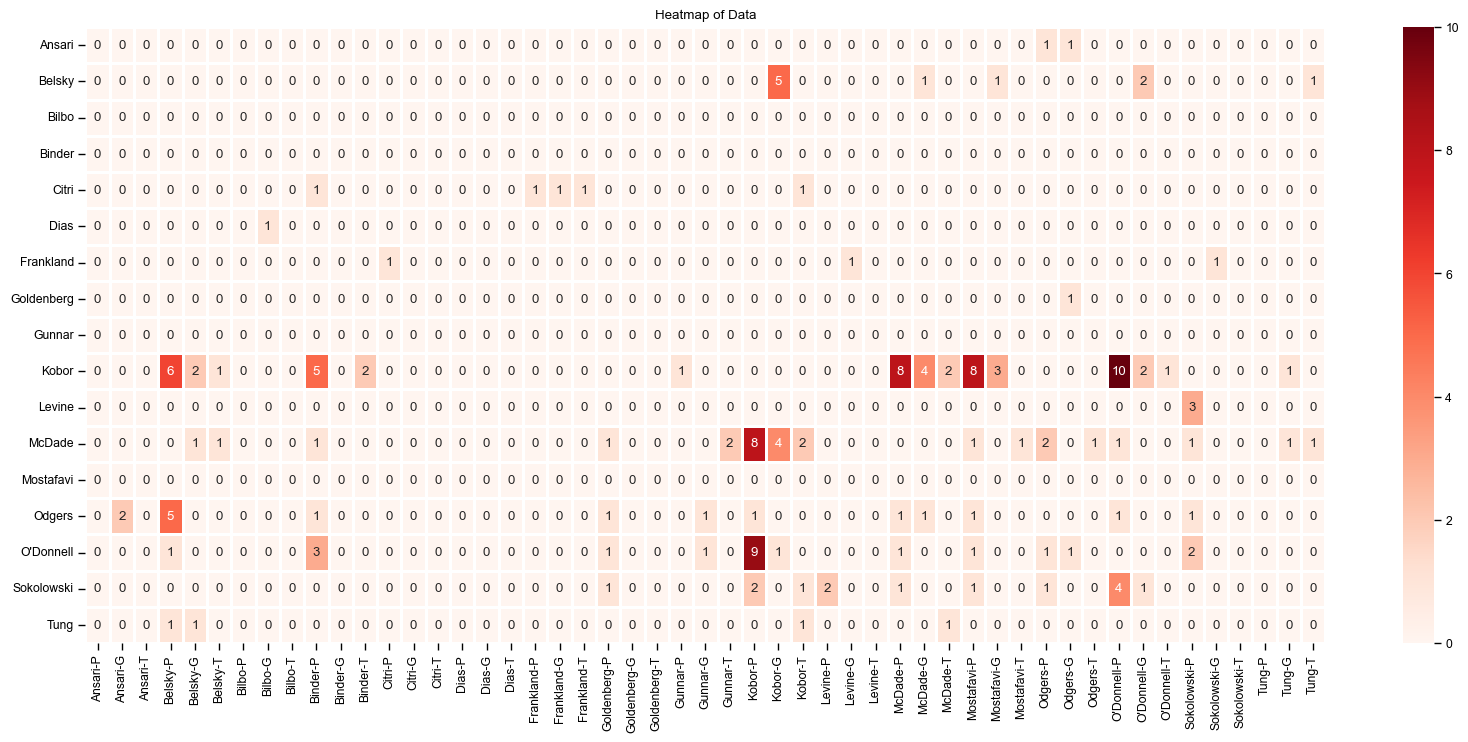

In [16]:
# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(data_df,
           **heatmap_options
           )
plt.xlabel("")
plt.title('Heatmap of Data')
# plt.show()

In [17]:
def select_type_data(df, data_type: str):
    assert data_type in ("P", "G", "T")
    
    tmp_df = data_df.loc[:, pd.IndexSlice[:, data_type]]
    # remove unused second level header
    tmp_df.columns = tmp_df.columns.levels[0]

    return tmp_df

In [18]:
data_df_p_connection = select_type_data(data_df, "P")

In [19]:
data_df_g_connection = select_type_data(data_df,"G")

In [20]:
data_df_t_connection = select_type_data(data_df, "T")

<Axes: >

Text(0.5, 23.71666666666666, '')

Text(0.5, 1.0, 'Heatmap of Data for P')

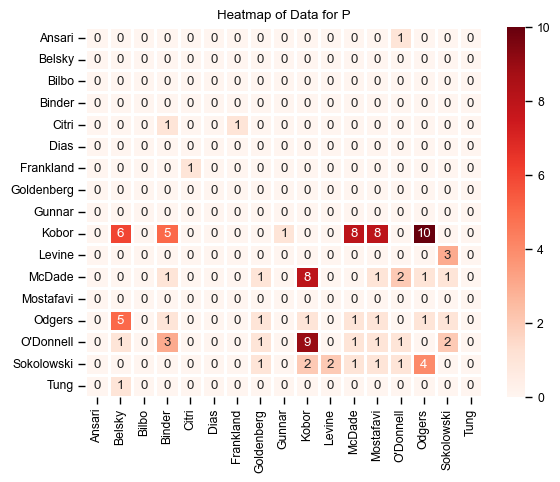

In [21]:
sns.heatmap(data_df_p_connection, 
              **heatmap_options)
plt.xlabel("")
plt.title('Heatmap of Data for P')

<Axes: >

Text(0.5, 23.71666666666666, '')

Text(0.5, 1.0, 'Heatmap of Data for T')

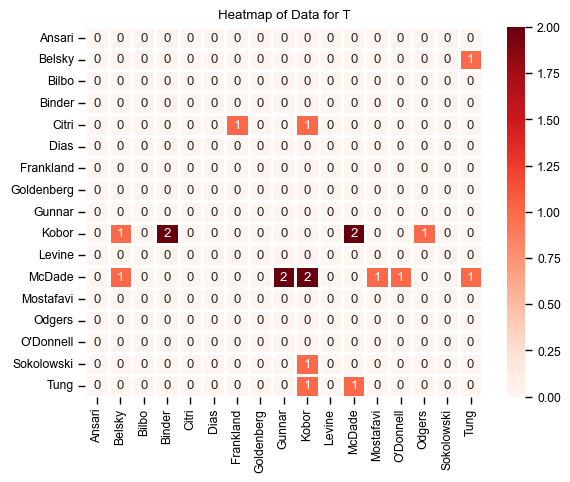

In [22]:
sns.heatmap(data_df_t_connection, 
              **heatmap_options)
plt.xlabel("")
plt.title('Heatmap of Data for T')

<Axes: >

Text(0.5, 23.71666666666666, '')

Text(0.5, 1.0, 'Heatmap of Data for G')

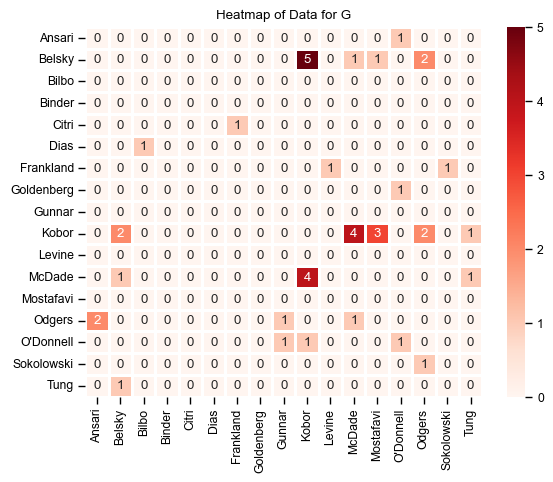

In [23]:
sns.heatmap(data_df_g_connection, 
             **heatmap_options)
plt.xlabel("")
plt.title('Heatmap of Data for G')

In [24]:
data_df_g_connection

,Ansari,Belsky,Bilbo,Binder,Citri,Dias,Frankland,Goldenberg,Gunnar,Kobor,Levine,McDade,Mostafavi,O'Donnell,Odgers,Sokolowski,Tung
Ansari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Belsky,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0
Bilbo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Binder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Citri,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dias,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Frankland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Goldenberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Gunnar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kobor,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,2.0,0.0,1.0


In [26]:
def collect_connection(df_connection, connection_type: str):
    result = {}
    
    for row in df_connection.index:
        for col in df_connection.columns:
            if row == col or df_connection.loc[row, col] == 0:
                continue

            key =  tuple(sorted([row, col]))
            if result.get(key) is None:
                result[key]  =   {"weight":df_connection.loc[row, col], "label": connection_type}
            else:
                result[key]["weight"] = max(result[key]["weight"], df_connection.loc[row, col])
    return result 
            
        
    

def build_graph(df):
    # Convert the dataframe to a list of tuples (index, column, value)
    data_df_p_connection = select_type_data(data_df, "P")
    data_df_g_connection = select_type_data(data_df, "G")
    data_df_t_connection = select_type_data(data_df, "T")

    result = {} 
    
    result.update(collect_connection(data_df_g_connection, "P"))
    result.update(collect_connection(data_df_p_connection, "G"))
    result.update(collect_connection(data_df_t_connection, "T"))
    
    return result

def viz_connect(data_df):
    pass


# Graph Viz

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

COLORS = {
        "P": '#E1BE6A',
        "G": '#40B0A6',
        "T": '#DC3220',
        "UNK": 'black'
    }

def assign_edge_color(labels, Colors=COLORS):
    for label in labels.values():
        yield Colors.get(label, Colors["UNK"])

def assign_edge_opacity(weights, max_weight):
    for weight in weights.values():
        yield (weight / max_weight)


def assign_edge_width(weights, max_weight, min_width=2, max_width=8):
    for weight in weights.values():
        yield min_width + (weight / max_weight) * (max_width - min_width)



def _cal_figure_size(nodes_size: int):
    unit = 2
    max_size = 20
    size = min(nodes_size * unit, max_size)
    return (size, size)

def draw_multiedge_labels(graph, pos, rad_values):
    edge_labels = {}
    for u, v, key, data in graph.edges(keys=True, data=True):
        if (u, v, key) not in edge_labels:
            edge_labels[(u, v, key)] = []
        edge_labels[(u, v, key)].append(str(data["label"]))

    for (u, v, key), labels in edge_labels.items():
        for i, label in enumerate(labels):
            rad = rad_values[i % len(rad_values)]  # Curvature
            offset_x = rad * 0.15 * (i + 1)
            offset_y = rad * 0.15 * (i + 1)
            x_pos = (pos[u][0] + pos[v][0]) / 2 + offset_x
            y_pos = (pos[u][1] + pos[v][1]) / 2 + offset_y
            plt.text(x_pos, y_pos, label, horizontalalignment="center", verticalalignment="center")

def visualize_graph_via_matplot(
    graph,
    title: str="",
    figure_name: str=None,
    seed=42,
    ax=None,
    layout=None,
) -> None:
    
    node_numbers = len(list(graph))

    # fig, ax = plt.subplots(figsize=_cal_figure_size(node_numbers))
    fig, ax = plt.subplots(figsize=(10,10))

    # pos = nx.spring_layout(graph, seed=seed)
    pos = nx.circular_layout(graph)
    

    edge_weights = nx.get_edge_attributes(graph, "weight")
    edge_labels = nx.get_edge_attributes(graph, "label")

    max_weight = max(edge_weights.values(), default=1)  # Ensure no division by zero

    edge_colors = list(assign_edge_color(edge_labels))
    edge_opacities = list(assign_edge_opacity(edge_weights, max_weight))
    edge_widths  = list(assign_edge_width(edge_weights, max_weight))


    node_options = {
        "node_size": 2800,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 4,
    }

    nx.draw_networkx_nodes(graph, pos=pos, ax=ax, **node_options)
    nx.draw_networkx_labels(graph, pos=pos, ax=ax, font_size=13)

    # Draw edges individually to handle different opacities and curvatures
    rad_values = [0, 0.1, -0.1]  # Curvature values for up to three edges
    edge_count = {}
    for (u, v, key, data), color, opacity, width in zip(graph.edges(keys=True, data=True), edge_colors, edge_opacities, edge_widths):
        edge_key = (u, v)
        if edge_key in edge_count:
            edge_count[edge_key] += 1
        else:
            edge_count[edge_key] = 0
        rad = rad_values[edge_count[edge_key] % len(rad_values)]  # Use curvature values
        nx.draw_networkx_edges(graph, pos=pos, edgelist=[(u, v)], ax=ax,
                               edge_color=color, 
                               # alpha=opacity,
                               connectionstyle=f"arc3,rad={rad}",
                               arrows=True,
                               width=width
                              )


    # Create custom legend
    legend_elements = [
        Line2D([0], [0], color=COLORS['P'], lw=3, label='P'),
        Line2D([0], [0], color=COLORS['G'], lw=3, label='G'),
        Line2D([0], [0], color=COLORS['T'], lw=3, label='T')
    ]
    ax.legend(handles=legend_elements, title="Connection Type")
    # draw_multiedge_labels(graph, pos, rad_values)

    ax.set_title(f"{title} Node number: {node_numbers}")
    plt.axis("off")
    plt.tight_layout()
    
    if figure_name is not None:
        plt.savefig(figure_name)
        
    plt.show()
    plt.close()


In [2]:
G = nx.MultiGraph()
graph_connections = build_graph(data_df)

for key, val in graph_connections.items():
    _ = G.add_edges_from([tuple([*key, val])])

NameError: name 'build_graph' is not defined

In [ ]:
visualize_graph_via_matplot(G, title="Connection Graph")

[0]

[1]

[2]

[0]

[1]

[0]

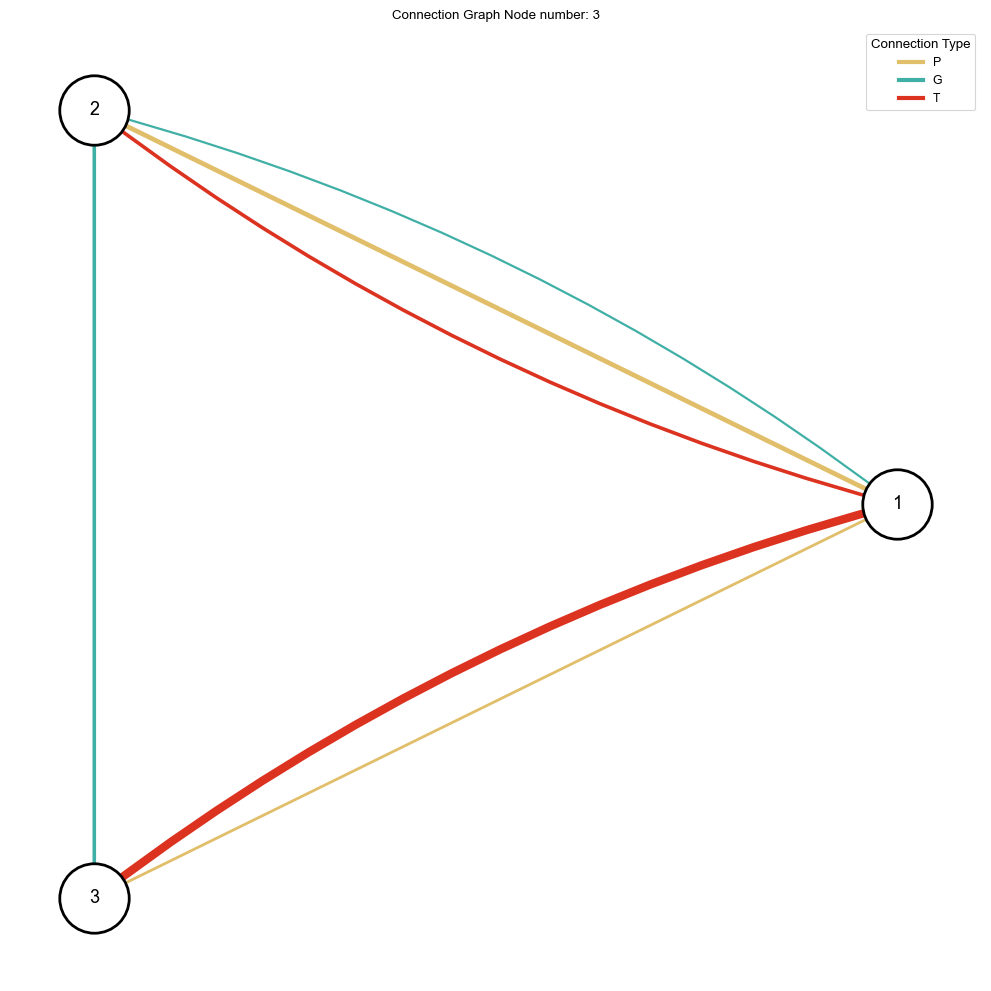

In [108]:
# Sample graph with multiple edges
G = nx.MultiGraph()
G.add_edges_from([(1, 2, {"weight": 12, "label": "P"})])
G.add_edges_from([(1, 2, {"weight": 3, "label": "G"})])
G.add_edges_from([(1, 2, {"weight": 8, "label": "T"})])
G.add_edges_from([(1, 3, {"weight": 5, "label": "P"})])
G.add_edges_from([(1, 3, {"weight": 25, "label": "T"})])
G.add_edges_from([(2, 3, {"weight": 8, "label": "G"})])

# Visualize the graph
visualize_graph_via_matplot(G, title="Connection Graph")

# different layout 
# use line width or alpha to show weight of edge 
# change color
# node size in term of degree (connections) 